In [ ]:
import pandas as pd
import numpy as np


pd.set_option('display.float_format', '{:.13f}'.format)


file_paths = [
    "/content/drive/MyDrive/OceansLSTM/surface_height.csv",
    "/content/drive/MyDrive/OceansLSTM/zonal current.csv",
    "/content/drive/MyDrive/OceansLSTM/vertical velocity at t points.csv",
    "/content/drive/MyDrive/OceansLSTM/sea surface temperature.csv",
    "/content/drive/MyDrive/OceansLSTM/dry blub temperature.csv",
    "/content/drive/MyDrive/OceansLSTM/potential temperature.csv",
    "/content/drive/MyDrive/OceansLSTM/surface heigh.csv",
    "/content/drive/MyDrive/OceansLSTM/salinity.csv",
    "/content/drive/MyDrive/OceansLSTM/surface height on  t cell.csv",
]


dfs = {}

for file in file_paths:
    try:

        file_name = file.split("/")[-1].replace(".csv", "").replace(" ", "_")


        df = pd.read_csv(file, skiprows=14, header=None, sep=None, engine='python')


        df.replace(['-999', '99999', 'NaN', 'Err', 'error', 'inf', '-inf', ''], np.nan, inplace=True)


        if df.shape[1] == 6:
            df.columns = ['DATETIME', 'TIME', 'LON', 'LAT', 'DEP', file_name]
            df.drop(['DATETIME', 'DEP'], axis=1, inplace=True)
        elif df.shape[1] == 5:
            df.columns = ['DATETIME', 'TIME', 'LON', 'LAT', file_name]
            df.drop(['DATETIME'], axis=1, inplace=True)
        else:
            print(f"⚠️ Skipping {file} due to unexpected format.")
            continue


        dfs[file] = df
        print(f"Loaded {file} | Shape: {df.shape}")

    except Exception as e:
        print(f"Error loading {file}: {e}")


merged_df = None
for file, df in dfs.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on=['TIME', 'LON', 'LAT'], how='outer')


error_values = [-9999999999999999455752309870428160.0000000000000, -999999.0, -9999.0]


merged_df.replace(error_values, np.nan, inplace=True)


merged_df = merged_df.bfill().ffill().interpolate()



merged_df = merged_df.bfill().ffill().interpolate()


print(merged_df.head())
print(f" Final merged dataset shape: {merged_df.shape}")


✅ Loaded /content/drive/MyDrive/OceansLSTM/surface_height.csv | Shape: (20379, 4)
✅ Loaded /content/drive/MyDrive/OceansLSTM/zonal current.csv | Shape: (17468, 4)
✅ Loaded /content/drive/MyDrive/OceansLSTM/vertical velocity at t points.csv | Shape: (17468, 4)
✅ Loaded /content/drive/MyDrive/OceansLSTM/sea surface temperature.csv | Shape: (20379, 4)
✅ Loaded /content/drive/MyDrive/OceansLSTM/dry blub temperature.csv | Shape: (140, 4)
✅ Loaded /content/drive/MyDrive/OceansLSTM/potential temperature.csv | Shape: (17468, 4)
✅ Loaded /content/drive/MyDrive/OceansLSTM/surface heigh.csv | Shape: (20379, 4)
✅ Loaded /content/drive/MyDrive/OceansLSTM/salinity.csv | Shape: (17468, 4)
✅ Loaded /content/drive/MyDrive/OceansLSTM/surface height on  t cell.csv | Shape: (17467, 4)
               TIME              LON              LAT   surface_height  \
0 374.2420000000000 81.5000000000000 17.5000000000000 10.7213000000000   
1 374.2420000000000 81.5000000000000 18.5000000000000 10.7213000000000   
2 

In [ ]:
merged_df.to_csv('/content/merged_dataset.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/merged_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


df = pd.read_csv("/content/merged_dataset.csv")


scaler = MinMaxScaler()
df.iloc[:, 3:] = scaler.fit_transform(df.iloc[:, 3:])


sequence_length = 10
features = df.iloc[:, 3:].values

X, y = [], []
for i in range(len(features) - sequence_length):
    X.append(features[i:i + sequence_length])
    y.append(features[i + sequence_length])

X, y = np.array(X), np.array(y)


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(X.shape[2])
])

model.compile(optimizer='adam', loss='mse')


model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1)


model.save("/mnt/data/lstm_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 0.0098 - val_loss: 0.0011
Epoch 2/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - loss: 0.0018 - val_loss: 6.9951e-04
Epoch 3/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - loss: 0.0013 - val_loss: 6.0551e-04
Epoch 4/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.0011 - val_loss: 5.8710e-04
Epoch 5/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 9.8413e-04 - val_loss: 5.3807e-04
Epoch 6/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 8.9101e-04 - val_loss: 5.3231e-04
Epoch 7/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 8.2082e-04 - val_loss: 4.6682e-04
Epoch 8/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 7.5902e-04 - val_loss: 4.3036e-04
Epoch 9/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - loss: 7.1782e-04 - val_loss: 5.8915e-04
Epoch 10/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - loss: 6.8223e-04 - val_loss: 4.7153e-04


In [ ]:
model.save("my_model.keras")

In [ ]:

num_samples, timesteps, num_features = X_train.shape
X_train_reshaped = X_train.reshape(-1, num_features)
X_test_reshaped = X_test.reshape(-1, num_features)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)


X_train_scaled = X_train_scaled.reshape(num_samples, timesteps, num_features)
X_test_scaled = X_test_scaled.reshape(X_test.shape)


In [ ]:
y_pred_scaled = model.predict(X_test_scaled)


474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


if 'scaler' in globals():
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_original = scaler.inverse_transform(y_test)
else:
    y_pred = y_pred_scaled
    y_test_original = y_test


mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 0.014577763117104493
MSE: 0.0007072556647214549
R² Score: 0.8645059929350191


In [ ]:
print(df.head)

<bound method NDFrame.head of                      TIME              LON              LAT  surface_height  \
0       374.2420000000000 81.5000000000000 17.5000000000000 0.6774252704933   
1       374.2420000000000 81.5000000000000 18.5000000000000 0.6774252704933   
2       374.2420000000000 82.5000000000000 16.5000000000000 0.6774252704933   
3       374.2420000000000 82.5000000000000 17.5000000000000 0.6774252704933   
4       374.2420000000000 82.5000000000000 18.5000000000000 0.6774252704933   
...                   ...              ...              ...             ...   
75829 44557.5000000000000 84.0844000000000 17.0027000000000 0.5870163212910   
75830 44557.5000000000000 84.0844000000000 17.3568000000000 0.5870163212910   
75831 44557.5000000000000 84.0844000000000 17.7178000000000 0.5870163212910   
75832 44557.5000000000000 84.0844000000000 18.0858000000000 0.5870163212910   
75833 44557.5000000000000 84.0844000000000 18.4608000000000 0.5870163212910   

        zonal_current

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - loss: 0.0127 - val_loss: 0.0052
Epoch 2/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 3/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 4/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 5/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 6/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 7/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 8/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 9/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 10/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 11/50
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 12

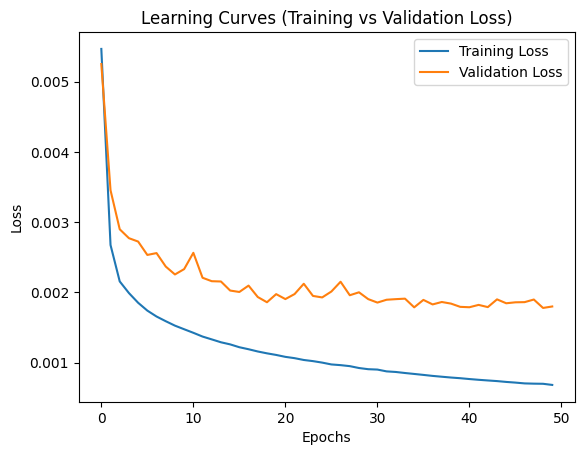

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
MAE: 0.014829120456637432
MSE: 0.0009917209912545884
R² Score: 0.7852341525870549
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Cross-Validation MAE: 0.020134737443323215
Cross-Validation MSE: 0.0014518092093125149
Cross-Validation R²: 0.8009091271015455


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df is already loaded and preprocessed
df = pd.read_csv('/content/drive/MyDrive/OceansLSTM/processed_dataset.csv')


scaler = MinMaxScaler()
df.iloc[:, 3:] = scaler.fit_transform(df.iloc[:, 3:])

sequence_length = 10
features = df.iloc[:, 3:].values

X, y = [], []
for i in range(len(features) - sequence_length):
    X.append(features[i:i + sequence_length])
    y.append(features[i + sequence_length])

X, y = np.array(X), np.array(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)  # Time series data, no shuffle
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(X_train.shape[2])
])

model.compile(optimizer='adam', loss='mse')

# Store history for plotting learning curves
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot Learning Curves (Training vs Validation Loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curves (Training vs Validation Loss)')
plt.show()

# Evaluate the Model on the Test Set
y_pred_scaled = model.predict(X_test)

# Inverse scaling if applicable
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test)

# Compute Evaluation Metrics
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

# Cross-validation using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Store cross-validation results
cv_mae, cv_mse, cv_r2 = [], [], []
for train_idx, val_idx in tscv.split(X):
    X_train_cv, X_val_cv = X[train_idx], X[val_idx]
    y_train_cv, y_val_cv = y[train_idx], y[val_idx]

    model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)
    y_pred_cv = model.predict(X_val_cv)

    # Inverse scaling for evaluation
    y_pred_cv = scaler.inverse_transform(y_pred_cv)
    y_val_cv = scaler.inverse_transform(y_val_cv)

    # Compute metrics for cross-validation fold
    cv_mae.append(mean_absolute_error(y_val_cv, y_pred_cv))
    cv_mse.append(mean_squared_error(y_val_cv, y_pred_cv))
    cv_r2.append(r2_score(y_val_cv, y_pred_cv))

print(f"Cross-Validation MAE: {np.mean(cv_mae)}")
print(f"Cross-Validation MSE: {np.mean(cv_mse)}")
print(f"Cross-Validation R²: {np.mean(cv_r2)}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


df = pd.read_csv("/content/drive/MyDrive/OceansLSTM/merged_dataset.csv")


scaler = MinMaxScaler()
df.iloc[:, 3:] = scaler.fit_transform(df.iloc[:, 3:])


sequence_length = 10
features = df.iloc[:, 3:].values

X, y = [], []
for i in range(len(features) - sequence_length):
    X.append(features[i:i + sequence_length])
    y.append(features[i + sequence_length])

X, y = np.array(X), np.array(y)


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(X.shape[2])
])

model.compile(optimizer='adam', loss='mse')


model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1)


model.save("/mnt/data/lstm_model.h5")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2133/2133 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 0.0105 - val_loss: 0.0013
Epoch 2/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 0.0019 - val_loss: 9.7731e-04
Epoch 3/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 0.0014 - val_loss: 7.1008e-04
Epoch 4/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.0012 - val_loss: 5.5749e-04
Epoch 5/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 0.0010 - val_loss: 6.0717e-04
Epoch 6/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 9.1995e-04 - val_loss: 5.3824e-04
Epoch 7/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - loss: 8.4896e-04 - val_loss: 5.7817e-04
Epoch 8/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 8.0709e-04 - val_loss: 5.2905e-04
Epoch 9/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 7.1538e-04 - val_loss: 3.9648e-04
Epoch 10/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 6.8299e-04 - val_loss: 5.0650e-04


In [ ]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 6.6382e-04 - val_loss: 4.0244e-04
Epoch 2/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 6.2021e-04 - val_loss: 4.1124e-04
Epoch 3/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 5.8132e-04 - val_loss: 3.8852e-04
Epoch 4/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 5.5626e-04 - val_loss: 4.3812e-04
Epoch 5/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 5.4038e-04 - val_loss: 3.3902e-04
Epoch 6/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 5.0435e-04 - val_loss: 3.7306e-04
Epoch 7/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 4.9118e-04 - val_loss: 3.8386e-04
Epoch 8/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 4.6710e-04 - val_loss: 3.9162e-04
Epoch 9/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 4.4445e-04 - val_loss: 3.8422e-04
Epoch 10/10
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 4.2917e-04 - val_loss: 3.6241e-04


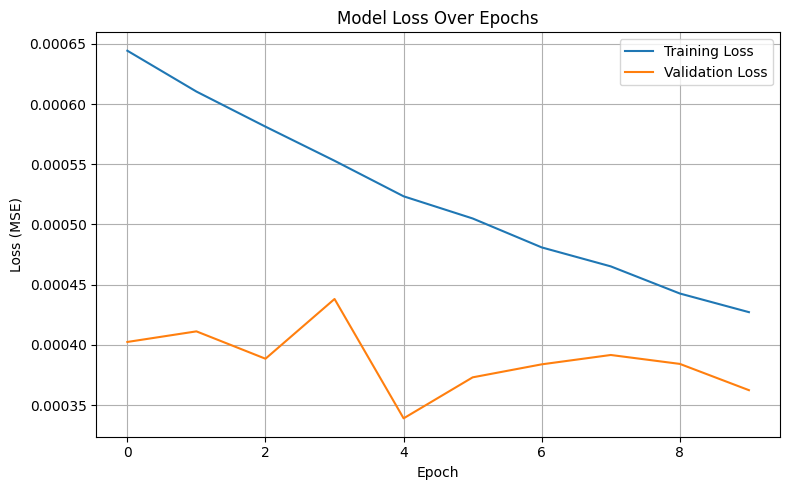

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2370/2370 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


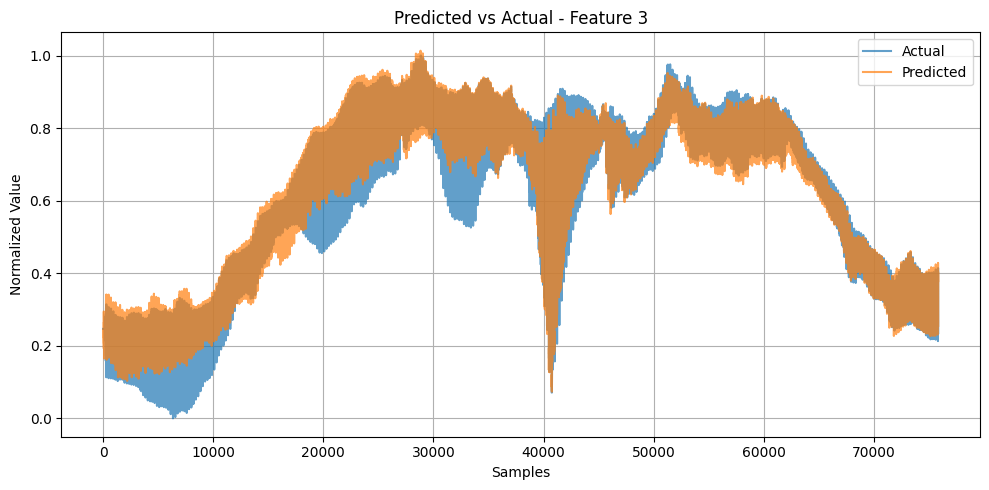

In [ ]:
# Predict on training data or a slice of it
predictions = model.predict(X)

# Select one feature (e.g., index 0 = dry bulb temperature)
feature_index = 3

plt.figure(figsize=(10, 5))
plt.plot(y[:, feature_index], label="Actual", alpha=0.7)
plt.plot(predictions[:, feature_index], label="Predicted", alpha=0.7)
plt.title('Predicted vs Actual - Feature {}'.format(feature_index))
plt.xlabel("Samples")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2370/2370 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step


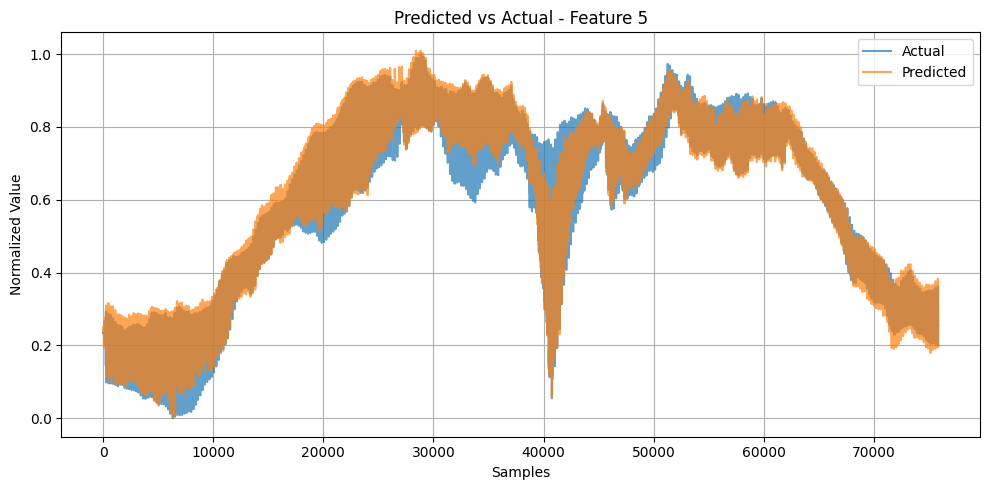

In [ ]:
predictions = model.predict(X)

feature_index = 5

plt.figure(figsize=(10, 5))
plt.plot(y[:, feature_index], label="Actual", alpha=0.7)
plt.plot(predictions[:, feature_index], label="Predicted", alpha=0.7)
plt.title('Predicted vs Actual - Feature {}'.format(feature_index))
plt.xlabel("Samples")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2370/2370 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


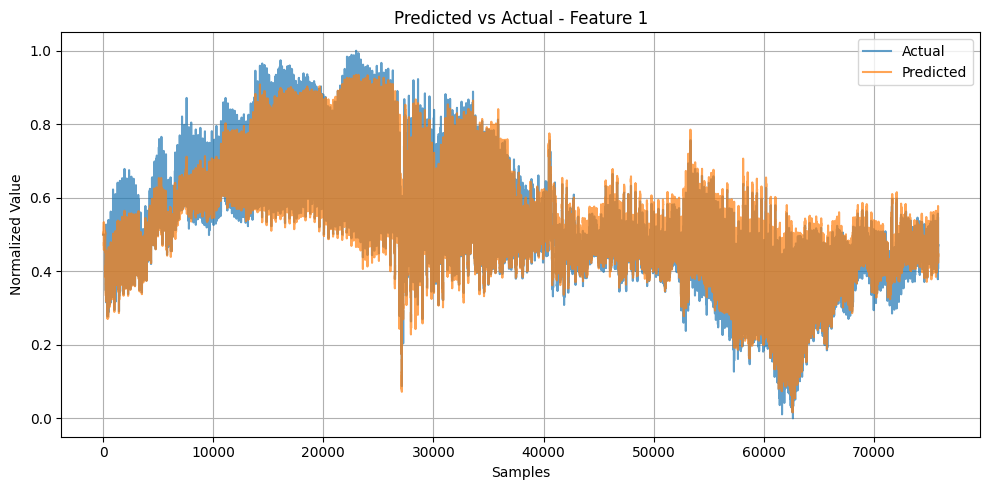

In [ ]:
predictions = model.predict(X)

feature_index = 1

plt.figure(figsize=(10, 5))
plt.plot(y[:, feature_index], label="Actual", alpha=0.7)
plt.plot(predictions[:, feature_index], label="Predicted", alpha=0.7)
plt.title('Predicted vs Actual - Feature {}'.format(feature_index))
plt.xlabel("Samples")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2370/2370 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


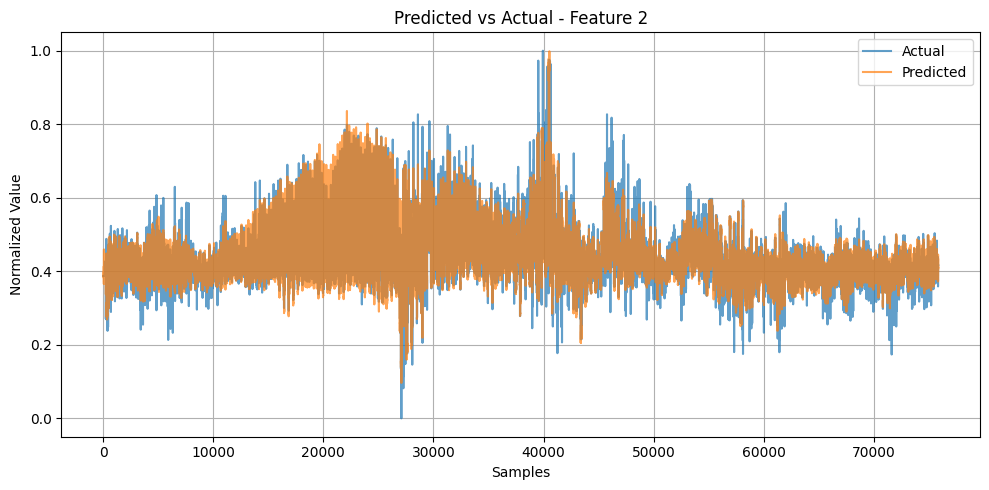

In [ ]:
predictions = model.predict(X)

feature_index = 2

plt.figure(figsize=(10, 5))
plt.plot(y[:, feature_index], label="Actual", alpha=0.7)
plt.plot(predictions[:, feature_index], label="Predicted", alpha=0.7)
plt.title('Predicted vs Actual - Feature {}'.format(feature_index))
plt.xlabel("Samples")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2370/2370 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


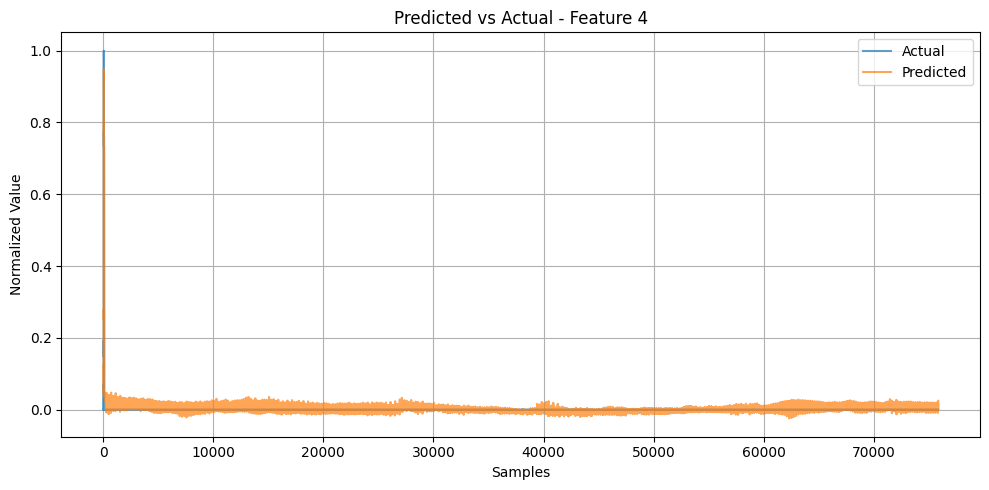

In [ ]:
predictions = model.predict(X)

feature_index = 4

plt.figure(figsize=(10, 5))
plt.plot(y[:, feature_index], label="Actual", alpha=0.7)
plt.plot(predictions[:, feature_index], label="Predicted", alpha=0.7)
plt.title('Predicted vs Actual - Feature {}'.format(feature_index))
plt.xlabel("Samples")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


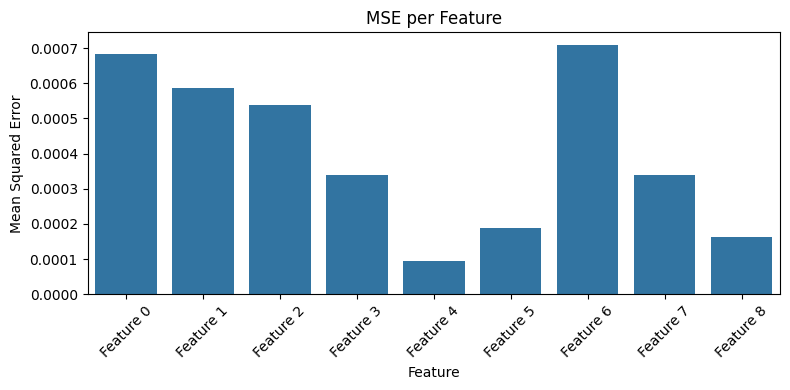

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

mse_per_feature = [mean_squared_error(y[:, i], predictions[:, i]) for i in range(y.shape[1])]

plt.figure(figsize=(8, 4))
sns.barplot(x=[f'Feature {i}' for i in range(y.shape[1])], y=mse_per_feature)
plt.title('MSE per Feature')
plt.ylabel('Mean Squared Error')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


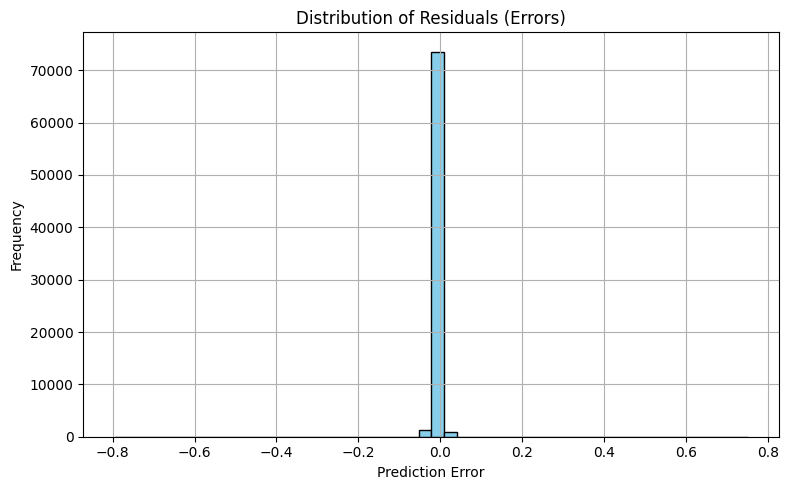

In [ ]:
residuals = y[:, feature_index] - predictions[:, feature_index]

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


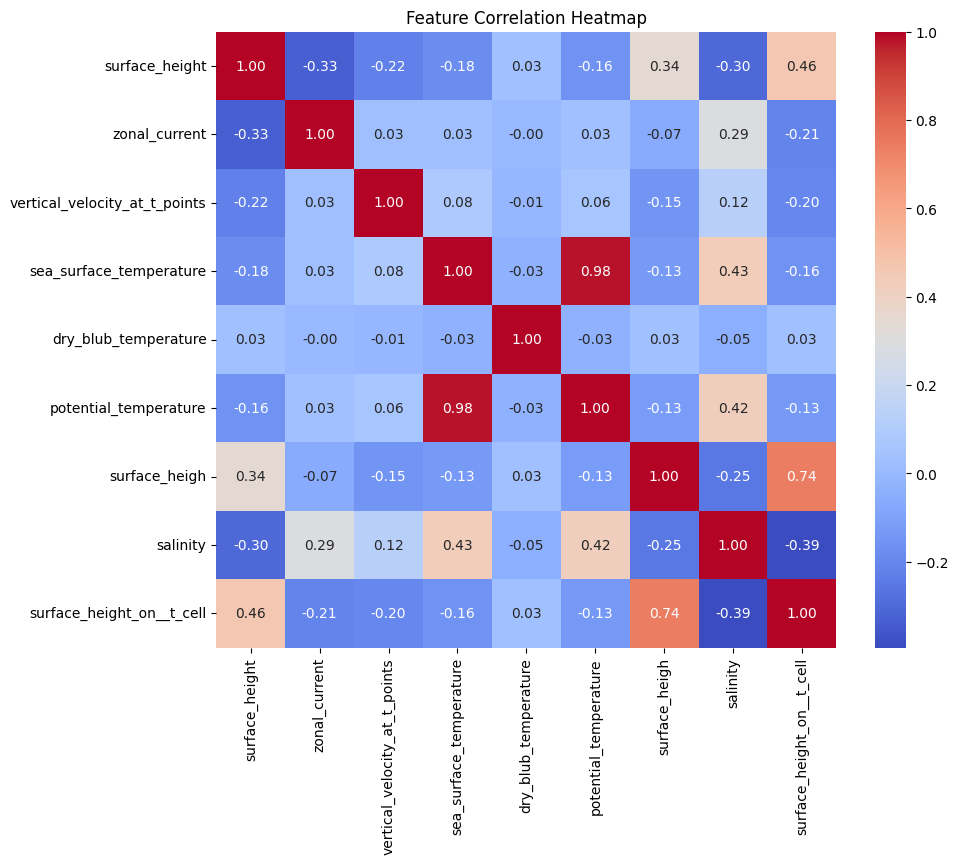

In [ ]:
import seaborn as sns

corr = df.iloc[:, 3:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


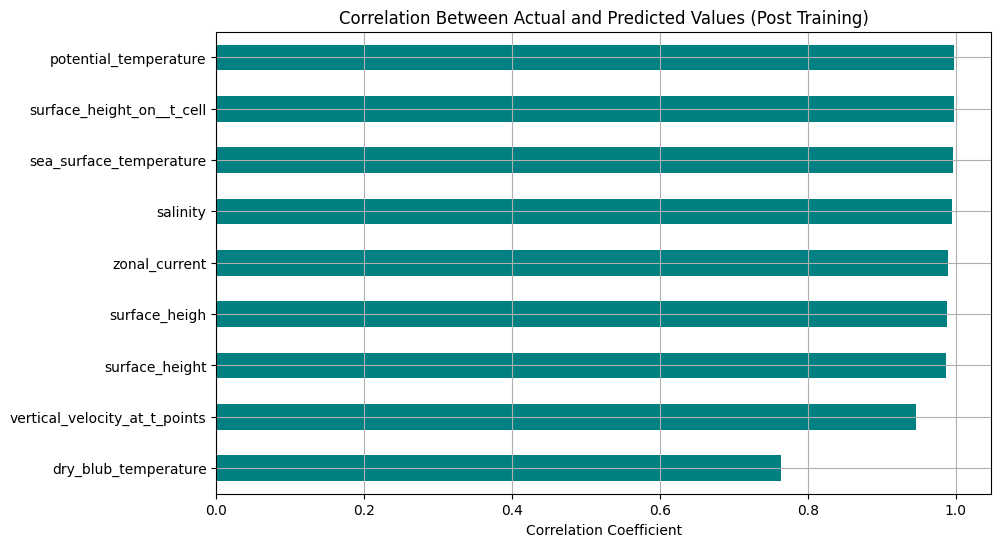

In [ ]:
import pandas as pd

# Convert to DataFrames for easier plotting and correlation
y_df = pd.DataFrame(y, columns=df.columns[3:])
pred_df = pd.DataFrame(predictions, columns=df.columns[3:])

# Calculate correlation for each feature
corr_after = y_df.corrwith(pred_df)

# Bar plot of correlation
plt.figure(figsize=(10, 6))
corr_after.sort_values().plot(kind='barh', color='teal')
plt.title('Correlation Between Actual and Predicted Values (Post Training)')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()


In [ ]:
merged_df = None

# Merge all DataFrames on TIME, LON, and LAT
for file, df in dfs.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on=['TIME', 'LON', 'LAT'], how='outer')

# Replace known extreme error values with NaN
error_values = [-9999999999999999455752309870428160.0000000000000, -999999.0, -9999.0]
merged_df.replace(error_values, np.nan, inplace=True)

# Fill missing values
merged_df = merged_df.bfill().ffill().interpolate()

print(merged_df.head())
print(f"Final merged dataset shape: {merged_df.shape}")


In [ ]:
def classify_suitability(dry_temp, sea_temp, surface_height, vertical_velocity, zonal_current):
    if (
        dry_temp >= 22 and
        sea_temp >= 20 and
        surface_height <= 1.5 and
        abs(vertical_velocity) <= 0.01 and
        abs(zonal_current) <= 0.5
    ):
        return "Suitable"
    else:
        return "Unsuitable"

pred_dry_temp = [23.5, 19.8, 24.2]
pred_sea_temp = [21.0, 19.5, 22.3]
pred_surf_ht = [1.0, 1.6, 0.9]
pred_vert_vel = [0.005, 0.02, 0.008]
pred_zonal_cur = [0.3, 0.7, 0.4]

suitability = []

for dry, sea, height, vert, zonal in zip(pred_dry_temp, pred_sea_temp, pred_surf_ht, pred_vert_vel, pred_zonal_cur):
    label = classify_suitability(dry, sea, height, vert, zonal)
    suitability.append(label)


print("Suitability predictions:")
for i, label in enumerate(suitability):
    print(f"Day {i+1}: {label}")


Suitability predictions:
Day 1: Suitable
Day 2: Unsuitable
Day 3: Suitable


In [ ]:
import pandas as pd

df = pd.DataFrame({
    "Dry Bulb Temperature (°C)": pred_dry_temp,
    "Sea Surface Temperature (°C)": pred_sea_temp,
    "Surface Height (m)": pred_surf_ht,
    "Vertical Velocity at T Points (m/s)": pred_vert_vel,
    "Zonal Current (m/s)": pred_zonal_cur
})


In [ ]:
def classify_suitability(dry_temp, sea_temp, surface_height, vertical_velocity, zonal_current):
    if (
        dry_temp >= 22 and
        sea_temp >= 20 and
        surface_height <= 1.5 and
        abs(vertical_velocity) <= 0.01 and
        abs(zonal_current) <= 0.5
    ):
        return "Suitable"
    else:
        return "Unsuitable"

df["Suitability"] = [
    classify_suitability(dry, sea, height, vert, zonal)
    for dry, sea, height, vert, zonal in zip(
        df["Dry Bulb Temperature (°C)"],
        df["Sea Surface Temperature (°C)"],
        df["Surface Height (m)"],
        df["Vertical Velocity at T Points (m/s)"],
        df["Zonal Current (m/s)"]
    )
]


In [ ]:
print(df)


   Dry Bulb Temperature (°C)  Sea Surface Temperature (°C)  \
0                       23.5                          21.0   
1                       19.8                          19.5   
2                       24.2                          22.3   

   Surface Height (m)  Vertical Velocity at T Points (m/s)  \
0                 1.0                                0.005   
1                 1.6                                0.020   
2                 0.9                                0.008   

   Zonal Current (m/s) Suitability  
0                  0.3    Suitable  
1                  0.7  Unsuitable  
2                  0.4    Suitable  


In [ ]:
from datetime import datetime, timedelta

# Example: Starting from today
start_date = datetime.now()
dates = [start_date + timedelta(days=i) for i in range(len(df))]
df["Date & Time"] = dates


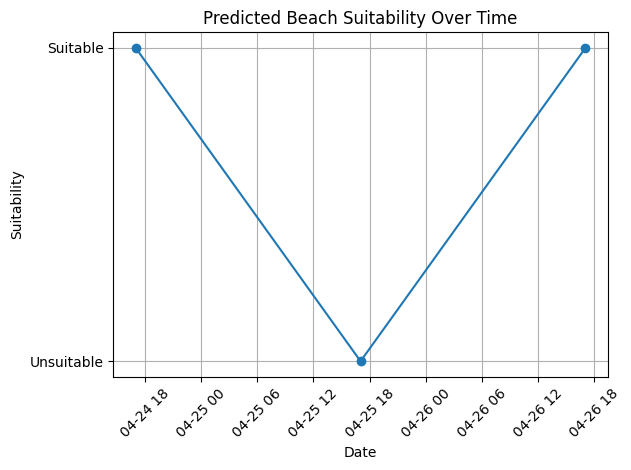

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df["Date & Time"], df["Suitability"].map({"Suitable": 1, "Unsuitable": 0}), marker='o')
plt.title("Predicted Beach Suitability Over Time")
plt.xlabel("Date")
plt.ylabel("Suitability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.yticks([0, 1], ["Unsuitable", "Suitable"])
plt.grid(True)
plt.tight_layout()
plt.show()
